<a href="https://colab.research.google.com/github/mneskovic/SVM-Exploration/blob/master/SVMExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting with SVM's


> Marko Neskovic

# SVM's in Colab with Random Gaussian Data

As an introduction to SVM's in Colab, I will be exploring SVM's by running experiments using two Gaussian distributions.

First, I'll do the standard imports:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

Next I'll make two Gaussian distributions (blobs) which are clearly separated.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


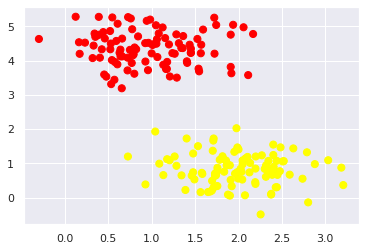

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=2,
                  random_state=0, cluster_std=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Let's split our data into test and training data, fit a Support Vector Classifier to the training data, and see how well it performs.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let's see the predictions for the training data, and the accuracy of our model.

In [ ]:
predictions = model.predict(X_test)
print(predictions)
percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

[0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 0 0 1 0]
Accuracy = 100.0 %


With our data as separated as this, it is natural that an SVM would work very well, as it maximizes the margin between our clusters, and neither have outliers which fall on the wrong side.

Let's see what happens when we decrease the margin between the two clusters by increasing their standard deviations:


Accuracy = 90.0 %


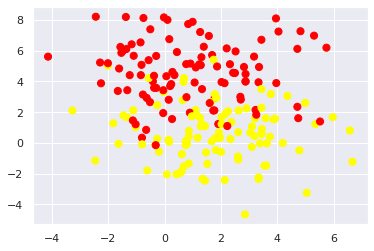

In [ ]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2,
                  random_state=0, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

As the margin decreases and there is more overlap between the clusters, the SVM begins to incorrectly classify some points because they are on the wrong side of the hyperplane, which decreases our accuracy.

Now let's add an extra feature/dimension to our data:

Accuracy = 98.0 %


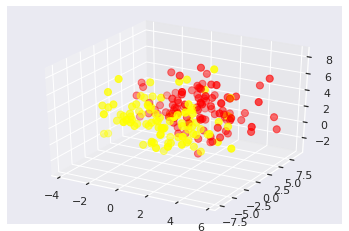

In [ ]:
X, y = make_blobs(n_samples=200, n_features=3, centers=2,
                  random_state=0, cluster_std=2)
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

As we can see, adding an extra feature to our data makes it more complex. It is evident, given the increased accuracy, that even with overlapping data our classifier worked better. This means that the extra feature held extra distinguishing power between the two distributions, which made it easier for our classifier to identify which class the data belongs to.


Currently, our data has been separated into two distinct blobs, so it is easy to separate them with a line. Other times it may not be so simple. Let's plot our data in a different shape.

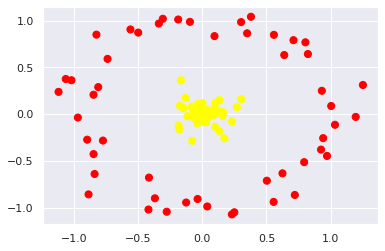

In [ ]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Let's see how well our linear SVM works under these circumstances.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

Accuracy = 64.0 %


As we can see, our linear kernel performs terribly, which is logical since we can't easily draw a line to separate the data. The solution is to use a different kernel which separates on a different basis than a line. Let's see how the results change when we use a quadratic kernel.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25)
model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

Accuracy = 100.0 %


As we can see, using a polynomial kernel with degree=2 (a quadratic kernel) does the job perfectly. 

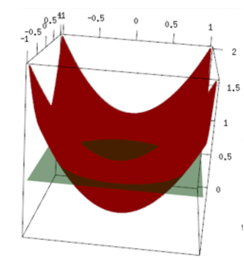

The above image shows why our quadratic kernel classifies so well, as it essentially maps our points into a higher degree space, and is then able to separate the classes using a plane because the "inner circle" is lower than the "outer ring."

Another popular kernel that we can use is the gaussian (radial-basis) kernel. This kernel works by comparing inputs with their distance from a fixed point, which works amazingly when it comes to circular data, which literally lie on radii.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

Accuracy = 100.0 %


One final point to make note of is the use of the gamma parameter when using SVM's. This parameter dictates the complexity of our decision boundary, and how closely it fits to our training data. We have been using the default gamma value which scales to our data, but in real experiments we could tune the gamma value to our needs. We must be careful however, because a high gamma value can lead to overfitting of the data, while a low gamma value can lead to underfitting the data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25)
model = SVC(kernel='rbf', gamma=5000)
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

Accuracy = 80.0 %


The high gamma is overfitting the data, so our model accuracy suffers drastically.

# Experimenting with Real-World Data

Now that we have a good grasp on how SVM's work and how we can vary them to work with different data distributions, let's experiment with some real-world data.

## UCI Iris Dataset

For this experiment I will be using the University of California-Irvine's Iris Data Set. It is a dataset which consists of different three different Iris plants, with the attributes being sepal length, sepal width, petal length, and petal width. The goal is to use SVM's to correctly classify plants as the correct type of iris.

Let's start by importing our data:

In [ ]:
import pandas as pd
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=",", header = None)
df.columns = ["sep_len", "sep_wid", "pet_len", "pet_wid", "y"]
df['y'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}, inplace=True)
df


,sep_len,sep_wid,pet_len,pet_wid,y
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Let's start by picking two attributes to see how different plants compare based on them.

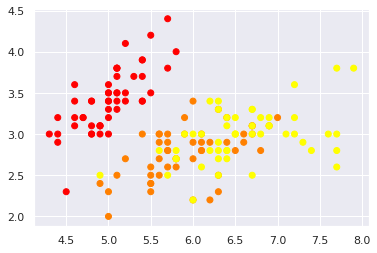

In [ ]:
plt.scatter(df['sep_len'], df['sep_wid'], c=df['y'], cmap='autumn');

Now let's run an SVM with the three different kernel types and see how they fare.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, [0,1]], df['y'],  test_size=0.25)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Linear Accuracy = {percentage*100} %")

model = SVC(kernel='poly', degree = 2)
model.fit(X_train, y_train)
percentage = model.score(X_test, y_test)
print(f"Polynomial Accuracy = {percentage*100} %")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
percentage = model.score(X_test, y_test)
print(f"Gaussian Accuracy = {percentage*100} %")

Linear Accuracy = 81.57894736842105 %
Polynomial Accuracy = 78.94736842105263 %
Gaussian Accuracy = 78.94736842105263 %


We see that all three of our models work similarly well, but we'd like to bump that accuracy up. So let's do what we did before, and add more dimensions. Specifically, let's add the other features that we haven't yet included.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[0:5]], df['y'],  test_size=0.25)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Linear Accuracy = {percentage*100} %")

model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Polynomial Accuracy = {percentage*100} %")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Gaussian Accuracy = {percentage*100} %")

Linear Accuracy = 100.0 %
Polynomial Accuracy = 100.0 %
Gaussian Accuracy = 100.0 %


For this dataset, all of the attributes held some crucial weight in determining whether a plant was an iris or not, so training our SVM with all of them gave us the best results, regardless of the kernel. The accuracy of all the kernels also indicates that the attributes give so much distinguishing power that virtually any geometric separator would probably work similarly, while a kernel such as a sigmoid (logistic) kernel which classifies by modeling probability would not.

As a sanity check, let's try it with a sigmoid kernel.

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Gaussian Accuracy = {percentage*100} %")

Gaussian Accuracy = 18.421052631578945 %


## UCI Wine Dataset

This dataset, also from the University of California Irvine, consists of wines and the chemicals that make them up. It has 13 attributes which will be used to classify three different types of wine.



Let's import some data again:

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep=",", header = None)
df.columns = ["y", "alc", "mal_acid", "ash", "alc_ash", "mag", "phen", "flav", "nonflav", "pro", "col", "hue", "dil", "proline"]
df


,y,alc,mal_acid,ash,alc_ash,mag,phen,flav,nonflav,pro,col,hue,dil,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Now let's start out simple by taking the first two attributes, Alcohol and Malic Acid, and using them to train our SVM.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, [1,2]], df['y'],  test_size=0.25)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Linear Accuracy = {percentage*100} %")

model = SVC(kernel='poly')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Polynomial Accuracy = {percentage*100} %")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Gaussian Accuracy = {percentage*100} %")

Linear Accuracy = 75.55555555555556 %
Polynomial Accuracy = 77.77777777777779 %
Gaussian Accuracy = 82.22222222222221 %


At first glance, it seems that all of our kernels work about the same, but we want to get our accuracy as close to 100% as we can. Let's see what happens when we use all the attributes in the dataset to train our model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:14]], df['y'],  test_size=0.25)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Linear Accuracy = {percentage*100} %")

model = SVC(kernel='poly')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Polynomial Accuracy = {percentage*100} %")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

percentage = model.score(X_test, y_test)
print(f"Gaussian Accuracy = {percentage*100} %")

Linear Accuracy = 95.55555555555556 %
Polynomial Accuracy = 57.77777777777777 %
Gaussian Accuracy = 60.0 %


As we can see, the linear kernel works beautifully, accurately classifying anywhere between 88-97% of the test data.

In [ ]:
model = SVC(kernel='linear', C=.3, gamma=0.000001)
model.fit(X_train, y_train)
percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

Accuracy = 95.55555555555556 %


Additionally, tuning the C and gamma parameters as shown above can slightly improve the accuracy of our model. This new model will have at worst the same accuracy rate, but sometimes slightly improves it.